## 1.Importing the dependencies

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
with open("../models/encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

In [3]:
#load the saved model and the feature names
with open("../models/customer_churn_model.pkl","rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [4]:
print(f"loaded_model: {loaded_model}\n feature_names: {feature_names}")

loaded_model: RandomForestClassifier(max_depth=11, min_samples_split=3, n_estimators=206,
                       n_jobs=-1, random_state=42)
 feature_names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


## 2.Performance Evaluation

In [5]:
names = ["X_test","y_test"]
loaded_data = {}
for name in names:
    with open(f"../data/{name}.pkl", "rb") as f:
        loaded_data[name] = pickle.load(f)
# Unpack variables
X_test = loaded_data["X_test"]
y_test = loaded_data["y_test"]

In [6]:
y_test_pred = loaded_model.predict(X_test)

In [7]:
print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))

print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))

print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7991483321504613
Confusion Matrix:
 [[890 146]
 [137 236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1036
           1       0.62      0.63      0.63       373

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.80      0.80      1409



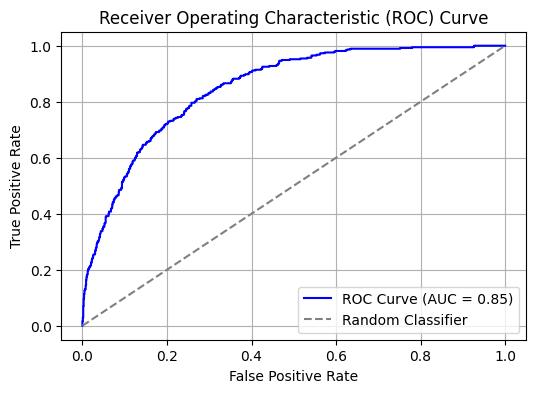

In [ ]:
# If your model has predict_proba
y_prob = loaded_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## 3.Testing on sample data point

In [8]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [12]:
input_data_df = pd.DataFrame([input_data])
# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

In [13]:
# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.49660545 0.50339455]]
